In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import math

import warnings
warnings.filterwarnings("ignore")

# Data 

Please, download the data to your working folder.On the webpage you can find its description. 

https://archive.ics.uci.edu/ml/datasets/Iris


In [7]:
iris = pd.read_csv('iris.data',header=None, names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target names'])

iris['target names'] = iris['target names'].map({'Iris-setosa':1, 'Iris-versicolor':0, 'Iris-virginica':0})

X = iris.iloc[:, :-1]

y = iris.iloc[:, -1]

X = np.c_[np.ones((X.shape[0], 1)), X]

y = y[:, np.newaxis]

theta = np.zeros((X.shape[1], 1))

del iris

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

del X, y

# Classification

## Logistic Regression

### Implement the "loss" function for Logistic Regression 

In [9]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

net_input = lambda theta, x: np.dot(x, theta)

probability = lambda theta, x: sigmoid(net_input(theta, x))

In [10]:
def loss_function(theta, x, y):
    m = x.shape[0]
    
    total_loss = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(1 - probability(theta, x))
    )
    
    return total_loss

### Implement the "fit" function gradient descent

In [11]:
def gradient(theta, x, y):
    m = x.shape[0]
    
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

In [7]:
# from scipy.optimize import fmin_tnc
# def fit(x, y, theta):
#     opt_weights = fmin_tnc(func=loss_function, x0=theta,
#                   fprime=gradient,args=(x, y.flatten()))
#     return opt_weights[0]
# parameters = fit(X_train, y_train, theta)
# parameters

In [12]:
def fit_gd(x, y, theta, lr = 0.01, n_iterations = 1000):
    loss_ = []
    
    for _ in range(n_iterations):
        theta -= lr * gradient(theta,x, y )
        loss = loss_function(theta, x, y)
        loss_.append(loss)
        
    return theta, loss_

### Implement predict function

In [13]:
def predict(x, theta, probab_threshold=0.5):
    probab = probability(theta, x)
    
    predicted_classes = (probab >= probab_threshold).astype(int)
    
    return predicted_classes.flatten()

### To evaluate the model, use accuracy, precision and recall metrics 

In [14]:
def accuracy(x, actual_classes, parameters):
    predicted_classes = predict(x, parameters).flatten()
    
    accuracy = np.mean(predicted_classes == actual_classes)
    
    return accuracy * 100

In [15]:
def confusion_matrix(predicted_classes, actual_classes):
    TP = []
    TN = []
    FN = []
    FP = []
    
    for i in range(len(actual_classes)):
        TP.append(predicted_classes[i] & actual_classes[i])
        TN.append(abs(predicted_classes[i]-1) & abs(actual_classes[i]-1))
        FP.append(np.where(predicted_classes[i]-actual_classes[i] == 1, 1, 0))
        FN.append(np.where(predicted_classes[i]-actual_classes[i] == -1, 1, 0))
        
    conf_mat = {
        'TP': np.sum(TP),
        'TN': np.sum(TN),
        'FN': np.sum(FN),
        'FP': np.sum(FP)
    }
    
    return conf_mat

In [16]:
def precision(x, actual_classes, parameters):
    predicted_classes = predict(x, parameters).flatten()
    
    conf_mat = confusion_matrix(predicted_classes, actual_classes)
    
    prec = conf_mat['TP'] / (conf_mat['TP'] + conf_mat['FP'])
    
    return prec

In [17]:
def recall(x, actual_classes, parameters):
    predicted_classes = predict(x, parameters).flatten()
    
    conf_mat = confusion_matrix(predicted_classes, actual_classes)
    
    rc = conf_mat['TP'] / (conf_mat['TP'] + conf_mat['FN'])
    
    return rc

### Choose the best learning rate

In [18]:
learning_rates = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]

for lr in learning_rates:
    params = fit_gd(X_train, y_train, theta, n_iterations=1000, lr=lr)[0]
    print('accuracy for {} learning rate:  {}'.format(lr, accuracy(X_test, y_test, params)))

accuracy for 1e-10 learning rate:  60.526315789473685
accuracy for 1e-09 learning rate:  60.526315789473685
accuracy for 1e-08 learning rate:  60.526315789473685
accuracy for 1e-07 learning rate:  60.526315789473685
accuracy for 1e-06 learning rate:  60.526315789473685
accuracy for 1e-05 learning rate:  60.526315789473685
accuracy for 0.0001 learning rate:  60.526315789473685
accuracy for 0.001 learning rate:  52.21606648199446
accuracy for 0.01 learning rate:  52.21606648199446
accuracy for 0.1 learning rate:  52.21606648199446
accuracy for 1 learning rate:  52.21606648199446


In [19]:
final_params, loss_output = fit_gd(X_train, y_train, theta, n_iterations=1000, lr=0.0001 )

### Plot loss output depending on iteration 

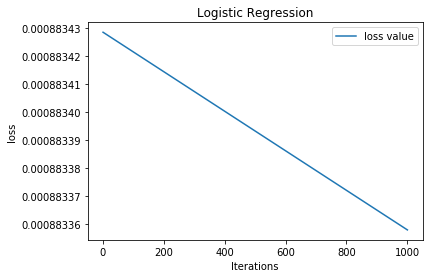

In [20]:
plt.plot(range(1, len(loss_output) + 1), loss_output, label = 'loss value')

plt.xlabel('Iterations')

plt.ylabel('loss')

plt.title('Logistic Regression')

plt.legend()

plt.show();

### Report the prediction accuracy on test data

In [21]:
accuracy(X_test, y_test, final_params)

52.21606648199446

In [22]:
precision(X_test, y_test, final_params)

1.0

In [23]:
recall(X_test, y_test, final_params)

1.0

## K-NN classification

### Create training/validation/test datasets with 80/10/10 ratio. Make sure that they do not overlap

In [25]:
iris = pd.read_csv('iris.data',header=None, names=['sl', 'sw', 'pl', 'pw', 'target'])
iris['target'] = pd.factorize(iris.target)[0]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :4], iris.iloc[:, 4:], test_size=0.10, random_state=42, shuffle=True)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.11, random_state=42, shuffle=True)

In [28]:
if (X_train.shape[0] + X_test.shape[0] + X_validation.shape[0] == iris.iloc[:, :4].shape[0]):
    print('They don\'t overlap')
else:
    print('They overlap')

They don't overlap


### Implement the K-NN algorithm: create two functions, fit() - that is responsible for training and predict() - which is responsible for predicting the values for new data points
 

In [81]:
# def euclideanDistance(instance1, instance2, length):
#     distance = 0
    
#     for component in range(length):
#         distance += (instance1[component] - instance2[component]) ** 2
        
#     return math.sqrt(distance)

In [82]:
def get_classes(training_set):
    return list(set([c[-1] for c in training_set]))


def find_neighbors(distances, k):
    return distances[0:k]


def find_response(neighbors, classes):
    votes = [0] * len(classes)

    for instance in neighbors:
        for ctr, c in enumerate(classes):
            if instance[-2] == c:
                votes[ctr] += 1

    return max(enumerate(votes), key=itemgetter(1))

In [ ]:
def knn(training_set, test_set, k):
    distances = []
    dist = 0
    limit = len(training_set[0]) - 1

    # generate response classes from training data
    classes = get_classes(training_set)

    try:
        for test_instance in test_set:
            for row in training_set:
                for x, y in zip(row[:limit], test_instance):
                    dist += (x-y) * (x-y)
                distances.append(row + [sqrt(dist)])
                dist = 0

            distances.sort(key=itemgetter(len(distances[0])-1))

            # find k nearest neighbors
            neighbors = find_neighbors(distances, k)

            # get the class with maximum votes
            index, value = find_response(neighbors, classes)

            # Display prediction
            print('The predicted class for sample ' + str(test_instance) + ' is : ' + classes[index])
            print('Number of votes : ' + str(value) + ' out of ' + str(k))

            # empty the distance list
            distances.clear()

    except Exception as e:
        print(e)

### For evaluation we will use "accuracy" metric - implement it :)

### Choose the best "k" value and report the accuracy for all k-values you have tried on validation data

### Report the accuracy for the best value of k on test data